### Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

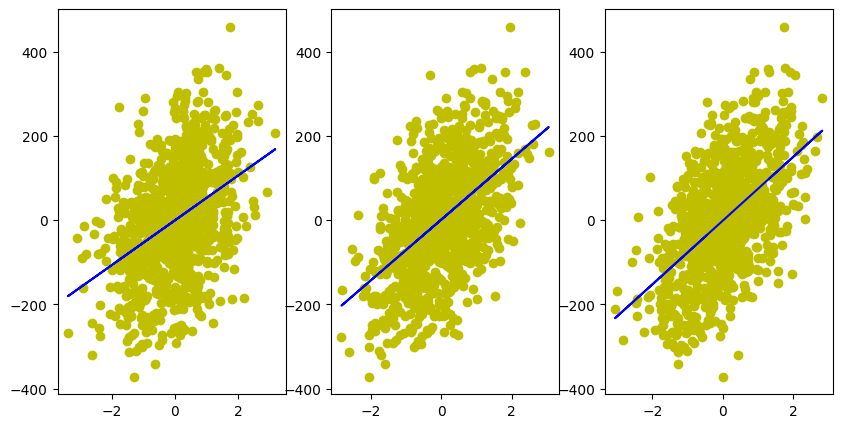

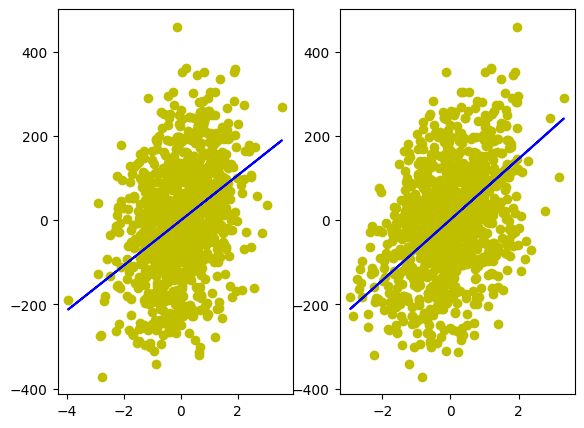

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
from scipy import stats
X,y = mr(n_samples=1000, n_features=5, noise=0) 

def myfunc(x):
  return slope * x + intercept

fig1,ax= plt.subplots(1,3,figsize=(10,5))
for i in range(3):
  slope, intercept, r, p, std_err = stats.linregress(X[:,i], y)
  mymodel = list(map(myfunc, X[:,i]))
  plt.subplot(1,3,1+i)
  plt.scatter(X[:,i],y, color='y')
  plt.plot(X[:,i], mymodel,c='b')
fig2,ax= plt.subplots(1,2,figsize=(6.67,5))
for i in range(2):
  slope, intercept, r, p, std_err = stats.linregress(X[:,i], y)
  mymodel = list(map(myfunc, X[:,i+3]))
  plt.subplot(1,2,1+i)
  plt.scatter(X[:,i+3],y, color='y')
  plt.plot(X[:,i+3], mymodel,c='b')

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

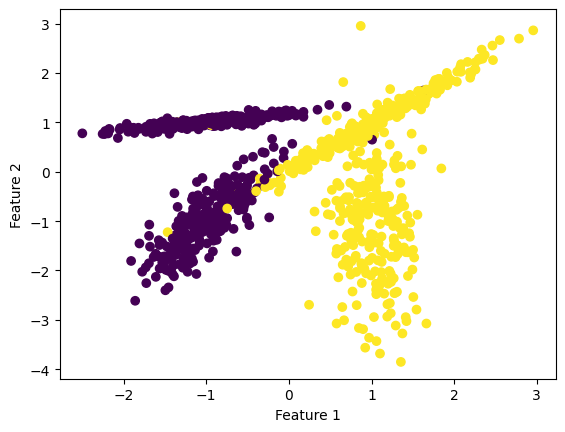

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(X[:, 0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

(400, 2)
(400,)


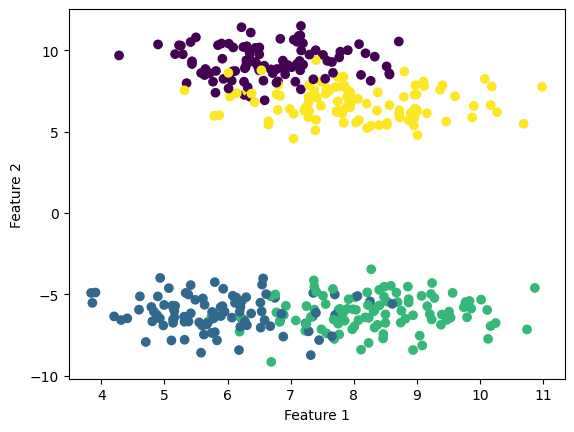

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=400, centers=4, n_features=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
     

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [6]:
import requests as req
import pandas as pd
import numpy as nm
from bs4 import BeautifulSoup
from lxml import etree

url = 'https://www.worldometers.info/coronavirus/'
page= req.get(url)
htmlcontent=page.content
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table',id="main_table_countries_today" )

headers = []
first_row=table.find('tr');

for i in (first_row.find_all('th')[1:2]+first_row.find_all('th')[15:13:-1]+first_row.find_all('th')[2:9]):
 title = i.text
 headers.append(title)
    
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in (row_data[1:2]+row_data[15:13:-1]+row_data[2:9])]
  length = len(mydata)
  mydata.loc[length] = row
mydata.drop(mydata.index[:8], inplace =True)
mydata.reset_index(inplace =True)
mydata.drop(mydata.index[231:239],inplace = True)
print(mydata)
     
     

     index   Country,Other          Continent   
0        8             USA      North America  \
1        9           India               Asia   
2       10          France             Europe   
3       11         Germany             Europe   
4       12          Brazil      South America   
..     ...             ...                ...   
226    234    Vatican City             Europe   
227    235  Western Sahara             Africa   
228    236      MS Zaandam                      
229    237         Tokelau  Australia/Oceania   
230    238           China               Asia   

                                        Population   TotalCases NewCases   
0                                     334,805,269   107,041,325           \
1                                   1,406,631,776    44,986,461            
2                                      65,584,518    40,054,863            
3                                      83,883,596    38,422,054            
4                              

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

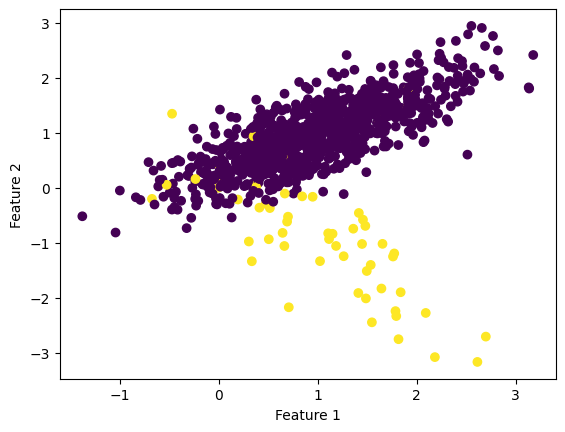

Counter({0: 943, 1: 57})

Oversampling the minority class to 5 times:



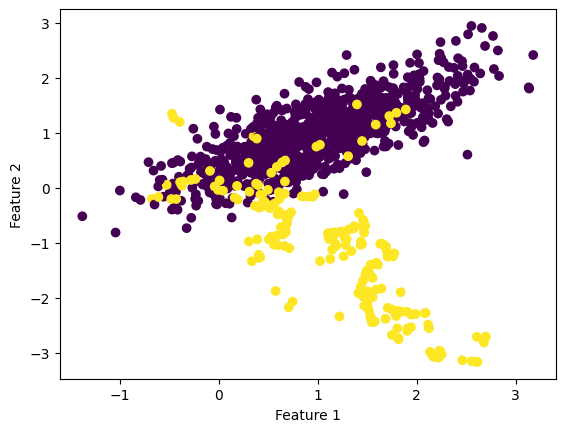

Counter({0: 943, 1: 235})

Undersampling the majority class to 3 times:



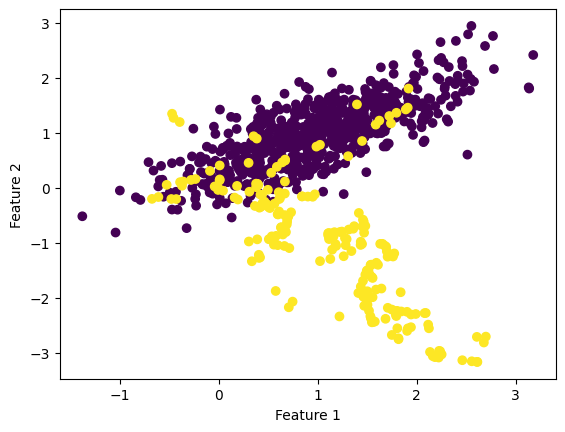

Counter({0: 712, 1: 235})


In [39]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[0.95],random_state=1)

plt.scatter(X[:, 0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

counter = Counter(y)
print(counter)

print("\nOversampling the minority class to 5 times:\n")
oversample = SMOTE(sampling_strategy=0.25)
X, y = oversample.fit_resample(X, y)

plt.scatter(X[:, 0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

counter = Counter(y)
print(counter)

print("\nUndersampling the majority class to 3 times:\n")
undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.33)
X, y = undersample.fit_resample(X, y)

plt.scatter(X[:, 0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

counter = Counter(y)
print(counter)


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [73]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Dimenson of training set:")
print(X_train.shape)
print(y_train.shape)
print("\nDimenson of testing set:")
print(X_test.shape)
print(y_test.shape,"\n")


scale = StandardScaler().fit(X_train)

X_train = scale.transform(X_train)

X_test = scale.transform(X_test)

print("First 5 rows of the standardized training set:\n")
for i in range(0,5):
   print(X_train[i])


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Dimenson of training set:
(105, 4)
(105,)

Dimenson of testing set:
(45, 4)
(45,) 

First 5 rows of the standardized training set:

[ 2.26050169 -1.05089682  1.77622921  1.42370971]
[-0.11897377  1.82764665 -1.14491883 -1.14263397]
[-0.95179019  1.3478894  -1.3134466  -1.27095115]
[-1.18973773 -0.09138233 -1.3134466  -1.14263397]
[-0.71384264 -0.8110182   0.0909515   0.26885505]
